Перед тем, как отркыть файл, я в MS EXcel изменил немного таблицу: 
1)переименовал существующий столбец "Birthday" на "Birthday1";
2)исправил неккоректно введеные годы "Birthday1";
4)создал новый столбец "Birthday", который принимает значения годов из "Birthday1", так как, при открытии файла в юпитере, pandas сама присваивала столбцу "Birthday" время 00:00:00
5)присвоил "Birthday" только годы из "Birthday1"
6)присвоил значения "Year" в "Birthday" для тех столбцов, где "Birthday1" были пустыми
7)в "Birthday"  первая дата была неправильно введена, так как значения в "Birthday" и в "Year" не совпадали, а также этот год был очень подозрительным, поэтому я его тоже исправил

In [1]:
import pandas as pd
data = pd.read_excel('Arvand.xlsx')
data

,KOD,Birthday,Birthday1,Year,Married,Gender,Nationality,Educ,FamilySize,BusExper,...,"Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)",Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль
0,70081389,1975,1925-02-05,1975.0,Оиладор,Мужской,Узбек,Оли,3,15,...,Категория 2,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0
1,70068103,1933,1933-03-27,NaN,Оиладор,Мужской,Точик,Миёна,3,NaN,...,Категория 4,0.0,0.0,0.0,11,5,5,1,0.0,0.0
2,70084699,1933,1933-03-27,NaN,Оиладор,Мужской,Точик,Миёна,3,NaN,...,Категория 3,0.0,0.0,0.0,0,0,0,2,0.0,1648.0
3,70067500,1933,1933-11-27,NaN,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,...,Категория 2,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0
4,1047372,1938,1938-04-23,1938.0,Оиладор,Мужской,Узбек,Миёна,1,5,...,Категория 4,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,210106137,1984,NaT,1984.0,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,...,Категория 2,0.0,0.0,0.0,53,14,6,1,2500.0,2683.0
85418,210107051,1990,NaT,1990.0,Беоила,Мужской,Узбек,Миёна,1,NaN,...,Категория 2,5000.0,5000.0,0.0,0,0,0,1,7360.0,6536.0
85419,210108260,1974,NaT,1974.0,Оиладор,Женский,Узбек,Оли,3,NaN,...,Категория 2,51600.0,96400.0,44800.0,0,0,0,1,5630.0,6043.0
85420,210108426,1985,NaT,1985.0,Оиладор,Мужской,Узбек,Миёна,2,5,...,Категория 3,12600.0,12600.0,0.0,2,1,2,1,0.0,780.0


# 1)Предобработка данных

### Удаление ненужных ячеек

In [2]:
#создаем новый датафрейм, для того чтобы не изменять data
data1=data.copy()

In [3]:
# Создаем новый столбец 'Combined_Birthday'
data1['Combined_Birthday'] = pd.NaT  # Инициализируем пустыми значениями

# Цикл для создания новой даты и заполнения столбца 'Combined_Birthday'
for index, row in data1.iterrows():
    #Берем год рождения из столбца Birthday, если ячейка пустая, то в качестве года рождения устанавливаем 1960г
    YY = row['Birthday'] if not pd.isnull(row['Birthday']) else 1960
    #Берем день рождения из столбца Birthday1, если ячейка пустая, то в качестве дня рождения устанавливаем 1
    dd = row['Birthday1'].day if not pd.isnull(row['Birthday1']) else 1
    #Берем месяц рождения из столбца Birthday1, если ячейка пустая, то в качестве месяца рождения устанавливаем январь
    mm = row['Birthday1'].month if not pd.isnull(row['Birthday1']) else 1
    #Заполняем новый столбец датой рождения в формата %d-%m-%Y
    combined_date = pd.to_datetime(f"{dd}-{mm}-{YY}", errors='coerce')
    data1.at[index, 'Combined_Birthday'] = combined_date


C:\Users\extre\AppData\Local\Temp\ipykernel_3496\1421378734.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_date = pd.to_datetime(f"{dd}-{mm}-{YY}", errors='coerce')


In [4]:
#Удаляем явно ненужные столбцы
data1 = data1.drop(['KOD', 'Birthday1', 'Year', 'Birthday'], axis=1)

In [5]:
data1

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Combined_Birthday
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0,1975-05-02
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,0.0,11,5,5,1,0.0,0.0,1933-03-27
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0.0,0,0,0,2,0.0,1648.0,1933-03-27
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0,1933-11-27
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0,1938-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,Ч. Расулов,Куруш,Бовари,Чорводори ва коркарди шир,...,0.0,0.0,0.0,53,14,6,1,2500.0,2683.0,1984-01-01
85418,Беоила,Мужской,Узбек,Миёна,1,NaN,Ч. Расулов,Спитамен,Хамкори,Кишту кор,...,5000.0,5000.0,0.0,0,0,0,1,7360.0,6536.0,1990-01-01
85419,Оиладор,Женский,Узбек,Оли,3,NaN,Ч. Расулов,Гулякандоз,VIP,Ремонт дома,...,51600.0,96400.0,44800.0,0,0,0,1,5630.0,6043.0,1974-01-01
85420,Оиладор,Мужской,Узбек,Миёна,2,5,Ч. Расулов,Дж.Расулов,Шарик,Чорводори ва коркарди шир,...,12600.0,12600.0,0.0,2,1,2,1,0.0,780.0,1985-01-01


In [6]:
print(data1['Дата выдачи'])

0       2015-01-19
1       2014-03-05
2       2015-04-01
3       2014-02-21
4       2014-01-13
           ...    
85417   2015-07-16
85418   2015-09-02
85419   2015-11-17
85420   2015-11-12
85421   2015-11-11
Name: Дата выдачи, Length: 85422, dtype: datetime64[ns]


In [7]:
import numpy as np
# Создание нового столбца "Age". От даты выдачи кредита отнимаем год рождения.
#Так как результат выводит только количество дней, поэтому делим на 365.25, чтобы учивать также высокосные годы
data1['Age'] = (data1['Дата выдачи'] - data1['Combined_Birthday']).dt.days / 365.25


In [8]:
#Все значения столбца Age делаем целочисенным
data1.Age = data1['Age'].astype(int)

In [9]:
data1.head()

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Combined_Birthday,Age
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,3000.0,0.0,46,23,4,1,0.0,180.0,1975-05-02,39
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,11,5,5,1,0.0,0.0,1933-03-27,80
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0,0,0,2,0.0,1648.0,1933-03-27,82
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5200.0,0.0,0,0,0,1,0.0,150.0,1933-11-27,80
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,7600.0,543.0,15,14,2,2,0.0,280.0,1938-04-23,75


In [10]:
#Удаляем столбец Combined_Birthday, так как он больше нам не нужен
data1=data1.drop('Combined_Birthday', axis=1)

In [11]:
data1.head()

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0,39
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,0.0,11,5,5,1,0.0,0.0,80
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0.0,0,0,0,2,0.0,1648.0,82
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0,80
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0,75


#### Преобразование категориальных переменных в фиктивные переменные (переменные со значениеми 0 и 1 и т.д.) 

In [12]:
data1['Married'].unique()

array(['Оиладор', 'Беоила', 'Бевамард (бевазан)', 'Чудошуда'],
      dtype=object)

In [13]:
#для Married
data1.loc[data1['Married'] == 'Беоила', 'isMarried'] = 0
data1.loc[data1['Married'] == 'Оиладор', 'isMarried'] = 1
data1.loc[data1['Married'] == 'Бевамард (бевазан)', 'isMarried'] = 2
data1.loc[data1['Married'] == 'Чудошуда', 'isMarried'] = 3

In [14]:
data1

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,isMarried
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,3000.0,0.0,46,23,4,1,0.0,180.0,39,1.0
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,11,5,5,1,0.0,0.0,80,1.0
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0,0,0,2,0.0,1648.0,82,1.0
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5200.0,0.0,0,0,0,1,0.0,150.0,80,0.0
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,7600.0,543.0,15,14,2,2,0.0,280.0,75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,Ч. Расулов,Куруш,Бовари,Чорводори ва коркарди шир,...,0.0,0.0,53,14,6,1,2500.0,2683.0,31,1.0
85418,Беоила,Мужской,Узбек,Миёна,1,NaN,Ч. Расулов,Спитамен,Хамкори,Кишту кор,...,5000.0,0.0,0,0,0,1,7360.0,6536.0,25,0.0
85419,Оиладор,Женский,Узбек,Оли,3,NaN,Ч. Расулов,Гулякандоз,VIP,Ремонт дома,...,96400.0,44800.0,0,0,0,1,5630.0,6043.0,41,1.0
85420,Оиладор,Мужской,Узбек,Миёна,2,5,Ч. Расулов,Дж.Расулов,Шарик,Чорводори ва коркарди шир,...,12600.0,0.0,2,1,2,1,0.0,780.0,30,1.0


In [15]:
data1['Gender'].unique()

array(['Мужской', 'Женский'], dtype=object)

In [16]:
#для Gender
data1.loc[data1['Gender'] == 'Мужской', 'isFemale'] = 0
data1.loc[data1['Gender'] == 'Женский', 'isFemale'] = 1

In [17]:
columns = ['Nationality', 'Educ', 'Filial', 'Region', 
      'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
     'Навпреление деятельности', 'Продукт', 'Сектор', 'Валюта кредита']
for column in columns:
    print(column, data1[column].unique())

Nationality ['Узбек' 'Точик' 'Тотор' 'Рус' 'Киргиз' 'Украин' 'Другие' 'Карис'
 'Карачои']
Educ ['Оли' 'Миёна' 'Миёнаи махсус' 'Олии нопурра' 'Миёнаи нопурра'
 'Аспирантура']
Filial ['Истаравшан' 'Хучанд' 'Ч. Расулов' 'Душанбе' 'Исфара' 'Панчакент']
Region ['Шахристон' 'Гули сурх' 'Худжанд-Центр' 'Спитамен' 'Шарк' 'Мархамат'
 'Душанбе' 'Навкент' 'Кистакуз' 'Худжанд-Панчшанбе' 'Бустон'
 'Истаравшан-филиал' 'Рудаки' 'Ашт' 'Калининобод' 'Сино' 'Исфара' 'Хисор'
 'Зафаробод' 'Ничони' 'Вахдат' 'Мехнатобод' 'Уяс' 'Дж.Расулов' 'Конибодом'
 'Дусти' 'Ниёзбек' 'Истаравшан' 'Рогун' 'Гончи' 'Чашмасор' 'Нофароч'
 'Ободи' 'Каракчикум' 'Оббурдон' 'Куруш' 'Ворух' 'Гулякандоз' 'Некфайз'
 'Сомгор' 'Пунук' 'Панчакент' 'Кулканд' 'Оппон' 'Файзобод' 'Турсунзода'
 'Гусар' 'Равшан' 'Ифтихор' 'Х.Алиев' 'Ёри' 'Мучун' 'Саразм']
Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет) ['Бовари' 'Хамкори' 'Шарик' 'VIP']
Навпреление деятельности ['Чорводори ва коркарди шир' 'Приоб

In [18]:
#для Nationality
data1.loc[data1['Nationality'] == 'Другие', 'Nationality_code'] = 0
data1.loc[data1['Nationality'] == 'Точик', 'Nationality_code'] = 1
data1.loc[data1['Nationality'] == 'Узбек', 'Nationality_code'] = 2
data1.loc[data1['Nationality'] == 'Тотор', 'Nationality_code'] = 3
data1.loc[data1['Nationality'] == 'Рус', 'Nationality_code'] = 4
data1.loc[data1['Nationality'] == 'Киргиз', 'Nationality_code'] = 5
data1.loc[data1['Nationality'] == 'Украин', 'Nationality_code'] = 6
data1.loc[data1['Nationality'] == 'Карис', 'Nationality_code'] = 7
data1.loc[data1['Nationality'] == 'Карачои', 'Nationality_code'] = 8

In [19]:
#для Educ
data1.loc[data1['Educ'] == 'Оли', 'Educ_code'] = 0
data1.loc[data1['Educ'] == 'Миёна', 'Educ_code'] = 1
data1.loc[data1['Educ'] == 'Миёнаи махсус', 'Educ_code'] = 2
data1.loc[data1['Educ'] == 'Олии нопурра', 'Educ_code'] = 3
data1.loc[data1['Educ'] == 'Миёнаи нопурра', 'Educ_code'] = 4
data1.loc[data1['Educ'] == 'Аспирантура', 'Educ_code'] = 5

In [20]:
#кодировка столбца Filial с помощью `map`
filial_map={'Истаравшан':0, 'Хучанд':1, 'Ч. Расулов':2, 'Душанбе':3, 'Исфара':4, 'Панчакент':5}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Filial_code']=data1['Filial'].map(filial_map)

In [21]:
#автоматичнская кодировка значений столбца Region(порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Region_code'], _ = pd.factorize(data1['Region'])

In [22]:
#кодировка столбца 'Уровень клиента' с помощью `map`
client_map={'Бовари':0, 'Хамкори':1, 'Шарик':2, 'VIP':3}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Уровень клиента']=data1['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)'].map(client_map)

In [23]:
#автоматичнская кодировка значений столбца 'Навпреление деятельности' (порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Направление_деятельности'], _ = pd.factorize(data1['Навпреление деятельности'])

In [24]:
#кодировка столбца 'Продукт' с помощью `map`
product_map={'Кредит на предпринимательскую деятельность':0, 'Потребительский кредит':1,
 'Энергосберегающие технологии':2, 'Жилищный кредит':3}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Тип кредита']=data1['Продукт'].map(product_map)

In [25]:
#автоматичнская кодировка значений столбца 'Сектор' (порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Цель кредита'], _ = pd.factorize(data1['Сектор'])

In [26]:
#кодировка столбца 'Продукт' с помощью `map`
product_map={'Доллар США':0, 'Сомони':1, 'Рос.рубль':2}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Валюта_код']=data1['Валюта кредита'].map(product_map)

In [27]:
#Кодируем 'FamilySize' для 'Нет инфо'
data1.loc[data1['FamilySize'] == 'Нет инфо', 'FamilySize'] = 0
data1['FamilySize'].fillna(0, inplace=True)

In [28]:
#уникальные значения Залога
data1['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].unique()

array(['Категория 2', 'Категория 4', 'Категория 3', 'Группа',
       'Категория 1'], dtype=object)

In [29]:
#кодировка столбца 'Залог...' с помощью `map`
zalog_map={'Группа':0, 'Категория 1':1, 'Категория 2':2, 'Категория 3':3, 'Категория 4':4}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Залог_код']=data1['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].map(zalog_map)

In [30]:
data1 = data1.drop(['Married', 'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)', 'Gender', 'Nationality','Educ','Filial','Region','Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)','Навпреление деятельности','Продукт','Сектор','Валюта кредита'], axis=1)

In [31]:
data1

,FamilySize,BusExper,Дата выдачи,Сумма кредита,Срок кредита,Дата окончания по графику,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,...,Nationality_code,Educ_code,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код
0,3,15,2015-01-19,1000.0,12,2016-01-18,181.00,6.0,2820.0,3000.0,...,2.0,0.0,0,0,0,0,0.0,0,0,2
1,3,NaN,2014-03-05,1000.0,12,2015-03-05,109.67,0.0,0.0,0.0,...,1.0,1.0,0,1,0,1,1.0,1,1,4
2,3,NaN,2015-04-01,7600.0,12,2016-04-01,805.00,0.0,0.0,0.0,...,1.0,1.0,0,1,1,2,1.0,2,1,3
3,0,3,2014-02-21,1500.0,12,2015-02-20,162.93,1.0,5050.0,5200.0,...,1.0,2.0,0,0,0,0,0.0,0,1,2
4,1,5,2014-01-13,2500.0,12,2015-01-13,465.94,6.0,6777.0,7600.0,...,2.0,1.0,1,2,1,0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,10,2015-07-16,5000.0,12,2016-07-14,558.00,1.0,0.0,0.0,...,2.0,1.0,2,35,0,0,0.0,0,1,2
85418,1,NaN,2015-09-02,1400.0,24,2017-09-04,74.00,0.0,5000.0,5000.0,...,2.0,1.0,2,3,1,4,0.0,5,0,2
85419,3,NaN,2015-11-17,30000.0,36,2018-11-19,1264.00,1.0,51600.0,96400.0,...,2.0,0.0,2,37,3,2,3.0,11,1,2
85420,2,5,2015-11-12,3000.0,12,2016-11-14,295.00,0.0,12600.0,12600.0,...,2.0,1.0,2,23,2,0,0.0,0,1,3


In [32]:
for column in data1:
    if data1[column].dtype == 'O':  # Используем 'O' для строковых данных
        unique_values = data1[column].unique()
        unique_values = sorted(unique_values, key=lambda x: (str(x), x is None, isinstance(x, (int, float)))) #Для сортировки по возрастанию
        print(column, unique_values)

BusExper [',', 0, 0.4, '0.5', 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.3, 1.4, 1.5, 1.6, 1.7, 10, 100, 11, 113, 12, 123, 13, 14, 141, 15, 16, 17, 18, 19, '1мох', 2, 2.3, 2.4, 2.5, 2.7, 20, '20+', 21, 215, 22, 23, 24, 25, 26, 27, 28, 29, 3, 3.5, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, '4-мох', 4.5, 4.6, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, '4ё', 5, '5 мох', 50, 521, 6, '6-мох', 6.5, 60, '6мес', '6мох', 7, '7-мох', 73, 75, 8, '8-мох', 9, nan, 'мир', 'ъолия']


In [33]:
# Кодировка столбца 'BusExper' с помощью `map`
bus_map = {
    ',': 0, 0: 0, 0.4: 0, '0.5': 0, 0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 1: 0, 1.1: 0, 1.3: 0, 1.4: 0, 1.5: 0, 1.6: 0, 1.7: 0, '1мох': 0, 2: 0,
    2.3: 0, 2.4: 0, 2.5: 0, 2.7: 0, 3: 0, 3.5: 0, 4: 0, '4-мох': 0, 4.5: 0, 4.6: 0, 5: 0, '5 мох': 0, 'мир': 0,
    6: 1, '6-мох': 0, 6.5: 1, '6мес': 0, '6мох': 0, 7: 1, '7-мох': 0, 8: 1, '8-мох': 0, 9: 1, 10: 1, 100: 1,
    11: 2, 113: 2, 123: 2, 12: 2, 13: 2, 14: 2, 15: 2,
    16: 3, 17: 3, 18: 3, 19: 3, 20: 3,
    '20+': 4, 21: 4, 215: 4, 22: 4, 23: 4, 24: 4, 25: 4,
    26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5,
    141: 6, 41: 6, 42: 6, 43: 6, 44: 6, 45: 6, 46: 6, 47: 6, 48: 6, 49: 6, '4ё': 6, 50: 6,
    521: 7, 73: 7, 75: 7, 'ъолия': 7
}

# Создаем новый столбец и присваиваем ему кодированные значения
data1['business_experience'] = data1['BusExper'].map(bus_map)


Я разделил BusExper на интервалы 0-5 лет стажа, которое принимает метку 0, 5-10 лет - метка 1, 10-15 лет - метка 2, 15-20 лет стажа - метка 3, 20-25 лет - метка 4, 25-40 лет - метка 5, 40-50 лет стажа - метка 6, 50+ лет стажа - метка 7. При этом я предполагал, что значения больше 100 были введени случайно, и присваивал каждый к интервалу, которые больше всего подходит

In [34]:
data1['business_experience'].unique()

array([ 2., nan,  0.,  4.,  1.,  5.,  3.,  6.,  7.])

In [35]:
data1 = data1.drop('BusExper', axis=1)

In [36]:
data1.head()

,FamilySize,Дата выдачи,Сумма кредита,Срок кредита,Дата окончания по графику,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,...,Educ_code,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience
0,3,2015-01-19,1000.0,12,2016-01-18,181.00,6.0,2820.0,3000.0,0.0,...,0.0,0,0,0,0,0.0,0,0,2,2.0
1,3,2014-03-05,1000.0,12,2015-03-05,109.67,0.0,0.0,0.0,0.0,...,1.0,0,1,0,1,1.0,1,1,4,NaN
2,3,2015-04-01,7600.0,12,2016-04-01,805.00,0.0,0.0,0.0,0.0,...,1.0,0,1,1,2,1.0,2,1,3,NaN
3,0,2014-02-21,1500.0,12,2015-02-20,162.93,1.0,5050.0,5200.0,0.0,...,2.0,0,0,0,0,0.0,0,1,2,0.0
4,1,2014-01-13,2500.0,12,2015-01-13,465.94,6.0,6777.0,7600.0,543.0,...,1.0,1,2,1,0,0.0,0,1,4,0.0


In [37]:
#Поменяем валюту кредита на сомони в соответствии с курсом валют в 2014 и в 2015гг
Dollar_2014 = (data1['Валюта_код'] == 0) & (data1['Дата выдачи'].dt.year == 2014)
Dollar_2015 = (data1['Валюта_код'] == 0) & (data1['Дата выдачи'].dt.year == 2015)
Ruble_2014 = (data1['Валюта_код'] == 2) & (data1['Дата выдачи'].dt.year == 2014)
Ruble_2015 = (data1['Валюта_код'] == 2) & (data1['Дата выдачи'].dt.year == 2015)

data1.loc[Dollar_2014, 'Сумма кредита'] *= 5.1181
data1.loc[Dollar_2015, 'Сумма кредита'] *= 6.7932
data1.loc[Ruble_2014, 'Сумма кредита'] *= 0.088
data1.loc[Ruble_2015, 'Сумма кредита'] *= 0.1024

#### Заполнение пустых ячеек

In [38]:
data1 = data1.drop(['Дата выдачи','Дата окончания по графику'], axis=1)

In [39]:
data1.isnull().sum()

FamilySize                                            0
Сумма кредита                                         0
Срок кредита                                          0
Ежемесячная сумма погашения по графику                0
Льготный период (месяц)                            1515
Капитал                                              66
Актив                                                36
Обязательства                                        39
Дни просрочки                                         0
Максимальные дни просрочки                            0
Количество просрочек                                  0
Этап кредитования (который раз получает кредит        0
Валовая прибыль                                    5715
Чистая прибыль                                     5715
Age                                                   0
isMarried                                             0
isFemale                                              0
Nationality_code                                

In [40]:
data1.describe()

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,...,Educ_code,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience
count,85422.000000,85422.000000,85422.000000,85422.000000,83907.000000,8.535600e+04,8.538600e+04,85383.000000,85422.000000,85422.000000,...,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85336.000000,85422.000000,85422.000000,85422.000000,65069.000000
mean,2.675774,6716.636227,12.763843,582.871092,1.901033,1.059435e+04,1.210464e+04,702.061148,15.161340,8.826848,...,0.954930,1.616726,18.679403,0.808351,2.855740,0.477161,2.378673,0.805308,1.930077,1.271619
std,1.832014,13459.155442,5.396642,1292.947867,2.698440,5.030853e+04,5.448567e+04,4213.904780,48.960655,37.944300,...,0.562861,1.494246,13.519625,0.993673,3.632346,0.755313,3.219755,0.416906,1.506449,1.443552
min,0.000000,50.000000,1.000000,2.000000,0.000000,-6.271500e+04,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2000.000000,12.000000,164.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,4000.000000,12.000000,333.000000,1.000000,5.466000e+03,6.565000e+03,0.000000,1.000000,1.000000,...,1.000000,1.000000,16.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,7000.000000,12.000000,632.000000,3.000000,1.198100e+04,1.350000e+04,77.000000,7.000000,4.000000,...,1.000000,3.000000,29.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000
max,8.000000,339660.000000,120.000000,196947.000000,24.000000,9.679096e+06,1.049900e+07,266840.000000,913.000000,634.000000,...,5.000000,5.000000,52.000000,3.000000,23.000000,3.000000,25.000000,2.000000,4.000000,7.000000


In [41]:
from fancyimpute import IterativeImputer
import pandas as pd

# Список столбцов для предсказания
columns_to_fill = ['Льготный период (месяц)', 'Капитал', 'Актив', 'Обязательства', 'Валовая прибыль', 'Чистая прибыль', 'Тип кредита','business_experience']

# Проходим по всем столбцам для проверки корреляции
for column in columns_to_fill:
    # Проверяем корреляцию только для столбцов с числовыми данными
    if data1[column].dtype in ['int64', 'float64']:
        # Выбираем строки, где нет пропущенных значений в текущем столбце
        valid_data = data1[columns_to_fill + [column]].dropna()

        # Проверяем, что в данных для обучения модели нет пропущенных значений
        if not valid_data.isnull().values.any():
            # Используем fancyimpute для итеративной импутации (заполнения)
            imputer = IterativeImputer(sample_posterior=True, max_iter=10, random_state=0)
            imputed_values = imputer.fit_transform(data1[columns_to_fill + [column]])

            mask = data1[column].isnull()
            data1.loc[mask, column] = imputed_values[mask, -1]

In [42]:
#Все значения столбцов делаем целочисенным после импутации
data1[['Льготный период (месяц)', 'Тип кредита','business_experience']] = data1[['Льготный период (месяц)', 'Тип кредита','business_experience']].astype(int)

In [43]:
data1.isnull().sum()

FamilySize                                        0
Сумма кредита                                     0
Срок кредита                                      0
Ежемесячная сумма погашения по графику            0
Льготный период (месяц)                           0
Капитал                                           0
Актив                                             0
Обязательства                                     0
Дни просрочки                                     0
Максимальные дни просрочки                        0
Количество просрочек                              0
Этап кредитования (который раз получает кредит    0
Валовая прибыль                                   0
Чистая прибыль                                    0
Age                                               0
isMarried                                         0
isFemale                                          0
Nationality_code                                  0
Educ_code                                         0
Filial_code 

In [44]:
data1.describe()

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,...,Educ_code,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience
count,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,8.542200e+04,8.542200e+04,85422.000000,85422.000000,85422.000000,...,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000
mean,2.675774,6716.636227,12.763843,582.871092,1.885053,1.059435e+04,1.210464e+04,702.061148,15.161340,8.826848,...,0.954930,1.616726,18.679403,0.808351,2.855740,0.476680,2.378673,0.805308,1.930077,1.206902
std,1.832014,13459.155442,5.396642,1292.947867,2.677047,5.028910e+04,5.447419e+04,4212.942715,48.960655,37.944300,...,0.562861,1.494246,13.519625,0.993673,3.632346,0.755085,3.219755,0.416906,1.506449,1.265196
min,0.000000,50.000000,1.000000,2.000000,0.000000,-6.271500e+04,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2000.000000,12.000000,164.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,4000.000000,12.000000,333.000000,1.000000,5.475000e+03,6.600000e+03,0.000000,1.000000,1.000000,...,1.000000,1.000000,16.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,7000.000000,12.000000,632.000000,3.000000,1.197225e+04,1.350000e+04,80.000000,7.000000,4.000000,...,1.000000,3.000000,29.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000
max,8.000000,339660.000000,120.000000,196947.000000,24.000000,9.679096e+06,1.049900e+07,266840.000000,913.000000,634.000000,...,5.000000,5.000000,52.000000,3.000000,23.000000,3.000000,25.000000,2.000000,4.000000,7.000000


Судя по описательной статистике до и после импутации можно сказать, что множественная импутация заполнила значения довольно хорошо, так как сильных разбросов в значениях описательной статистике не видно

In [45]:
data1.columns

Index(['FamilySize', 'Сумма кредита', 'Срок кредита',
       'Ежемесячная сумма погашения по графику', 'Льготный период (месяц)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'isMarried', 'isFemale', 'Nationality_code',
       'Educ_code', 'Filial_code', 'Region_code', 'Уровень клиента',
       'Направление_деятельности', 'Тип кредита', 'Цель кредита', 'Валюта_код',
       'Залог_код', 'business_experience'],
      dtype='object')

In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FamilySize                                      85422 non-null  int64  
 1   Сумма кредита                                   85422 non-null  float64
 2   Срок кредита                                    85422 non-null  int64  
 3   Ежемесячная сумма погашения по графику          85422 non-null  float64
 4   Льготный период (месяц)                         85422 non-null  int32  
 5   Капитал                                         85422 non-null  float64
 6   Актив                                           85422 non-null  float64
 7   Обязательства                                   85422 non-null  float64
 8   Дни просрочки                                   85422 non-null  int64  
 9   Максимальные дни просрочки             

# 2)Проводите разведочный анализ данных (Exploratory data analysis)

### А) найдите параметры описательной статистики по некоторым значимым переменам

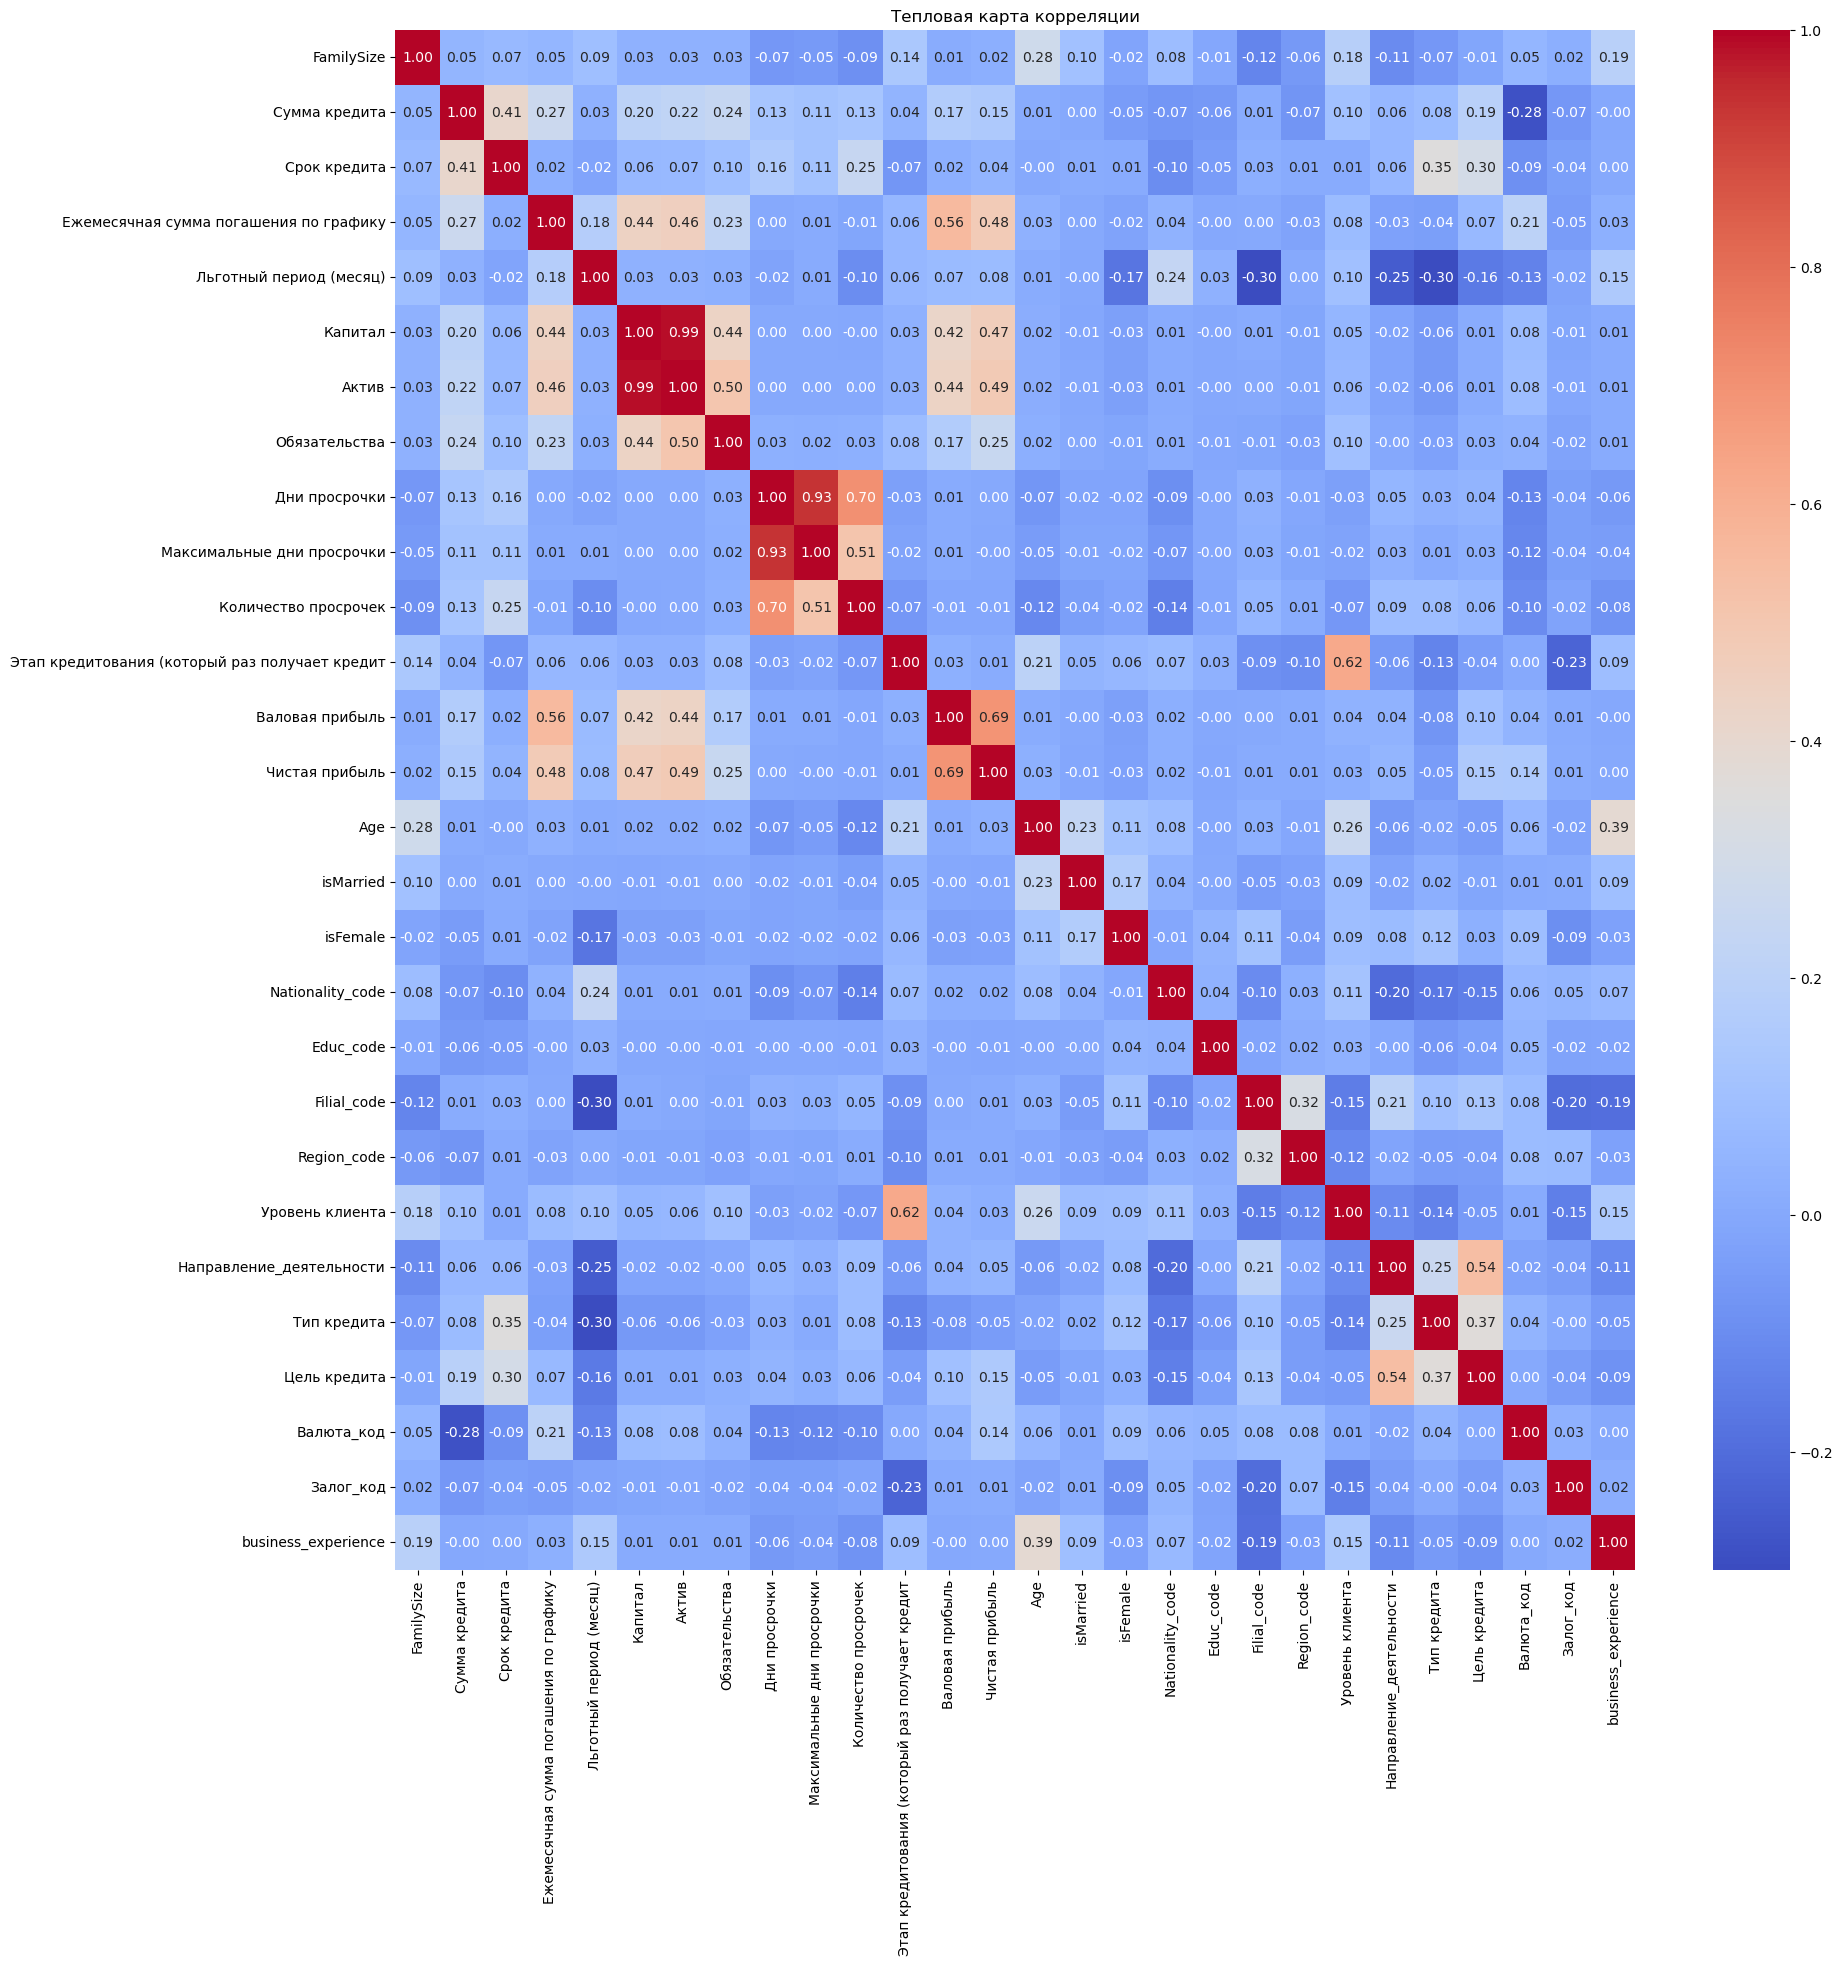

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем корреляцию
correlation_matrix = data1.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

In [48]:
#Удаляем переменные, у которых корреляция по отношению ко всем другим переменным ниже 0.35
data1 = data1.drop(['FamilySize', 'Льготный период (месяц)', 'isMarried', 'isFemale','Nationality_code',
                   'Educ_code','Filial_code','Filial_code','Валюта_код','Залог_код', 'Ежемесячная сумма погашения по графику', 'Капитал','Актив'], axis=1)

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Сумма кредита                                   85422 non-null  float64
 1   Срок кредита                                    85422 non-null  int64  
 2   Обязательства                                   85422 non-null  float64
 3   Дни просрочки                                   85422 non-null  int64  
 4   Максимальные дни просрочки                      85422 non-null  int64  
 5   Количество просрочек                            85422 non-null  int64  
 6   Этап кредитования (который раз получает кредит  85422 non-null  int64  
 7   Валовая прибыль                                 85422 non-null  float64
 8   Чистая прибыль                                  85422 non-null  float64
 9   Age                                    

In [50]:
import numpy as np
from scipy.stats import mode

mode_age = mode(data1['Age'])
print(f"Мода: {mode_age.mode[0]}, Частота: {mode_age.count[0]}")

Мода: 28, Частота: 2617


C:\Users\extre\AppData\Local\Temp\ipykernel_3496\1152296334.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_age = mode(data1['Age'])


In [51]:
mode_term = mode(data1['Срок кредита'])
print(f"Мода: {mode_term.mode[0]}, Частота: {mode_term.count[0]}")

Мода: 12, Частота: 54960


C:\Users\extre\AppData\Local\Temp\ipykernel_3496\2687462907.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_term = mode(data1['Срок кредита'])


In [52]:
mode_aim = mode(data1['Цель кредита'])
print(f"Мода: {mode_aim.mode[0]}, Частота: {mode_aim.count[0]}")

Мода: 0, Частота: 35349


C:\Users\extre\AppData\Local\Temp\ipykernel_3496\126861736.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_aim = mode(data1['Цель кредита'])


In [53]:
mode_type = mode(data1['Тип кредита'])
print(f"Мода: {mode_type.mode[0]}, Частота: {mode_type.count[0]}")

Мода: 0, Частота: 54929


C:\Users\extre\AppData\Local\Temp\ipykernel_3496\105285817.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_type = mode(data1['Тип кредита'])


Как видно из моды чаще всего берут кредит клиенты в возрасте 28 лет, целью кредита в большинстве случаев является животноводство, и клиенты обычно берут кредит на предпринимательскую деятельность, и кредит берут чаще всего с сроком на 12 месяцев

In [54]:
mean_sum = data1['Сумма кредита'].mean()
print(f"Среднее значение: {mean_sum}")

Среднее значение: 6716.636227139742


In [55]:
min_sum = data1['Сумма кредита'].min()
max_sum = data1['Сумма кредита'].max()
print(f"Минимум: {min_sum}, Максимум: {max_sum}")

Минимум: 50.0, Максимум: 339660.0


Судя по среднему значению клиенты в среднем берут кредит на 6716 сомони; минимальный кредит, который брали, - 50 сомон, максимальный-339660 сомон

### Б) нарисуйте графики (Box-plot, Scatter-plot и др.)  по некоторым значимым переменам

In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Сумма кредита                                   85422 non-null  float64
 1   Срок кредита                                    85422 non-null  int64  
 2   Обязательства                                   85422 non-null  float64
 3   Дни просрочки                                   85422 non-null  int64  
 4   Максимальные дни просрочки                      85422 non-null  int64  
 5   Количество просрочек                            85422 non-null  int64  
 6   Этап кредитования (который раз получает кредит  85422 non-null  int64  
 7   Валовая прибыль                                 85422 non-null  float64
 8   Чистая прибыль                                  85422 non-null  float64
 9   Age                                    

In [57]:
data1.columns

Index(['Сумма кредита', 'Срок кредита', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Уровень клиента',
       'Направление_деятельности', 'Тип кредита', 'Цель кредита',
       'business_experience'],
      dtype='object')

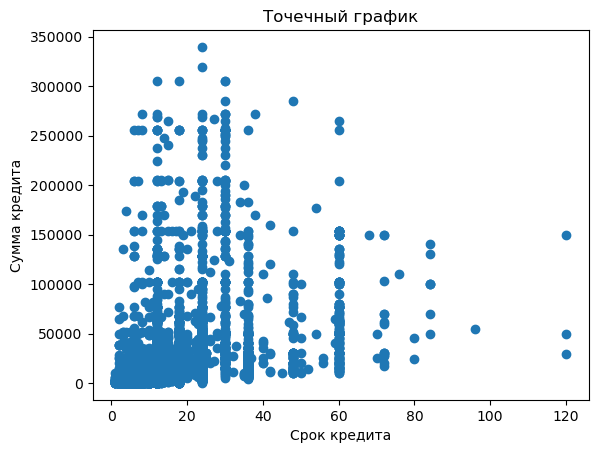

In [58]:
plt.scatter(data1['Срок кредита'], data1['Сумма кредита'])
plt.title('Точечный график')
plt.xlabel('Срок кредита')
plt.ylabel('Сумма кредита')
plt.show()

C:\Users\extre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\extre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\extre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


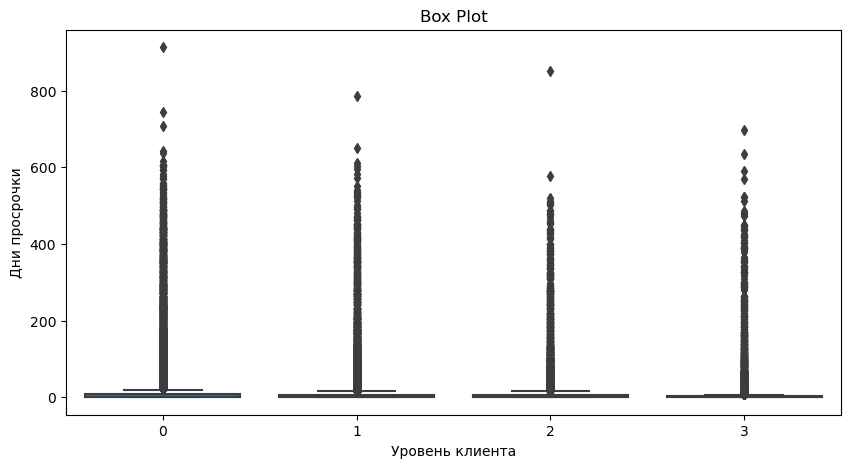

In [59]:
fig = plt.subplots(figsize=(10, 5))
sns.boxplot(x=data1['Уровень клиента'], y=data1['Дни просрочки'], data=data1)
plt.title('Box Plot')
plt.xlabel('Уровень клиента')
plt.ylabel('Дни просрочки')
plt.show()

### В) Нарисуйте корреляционную матрицу переменных с непрерывными данными

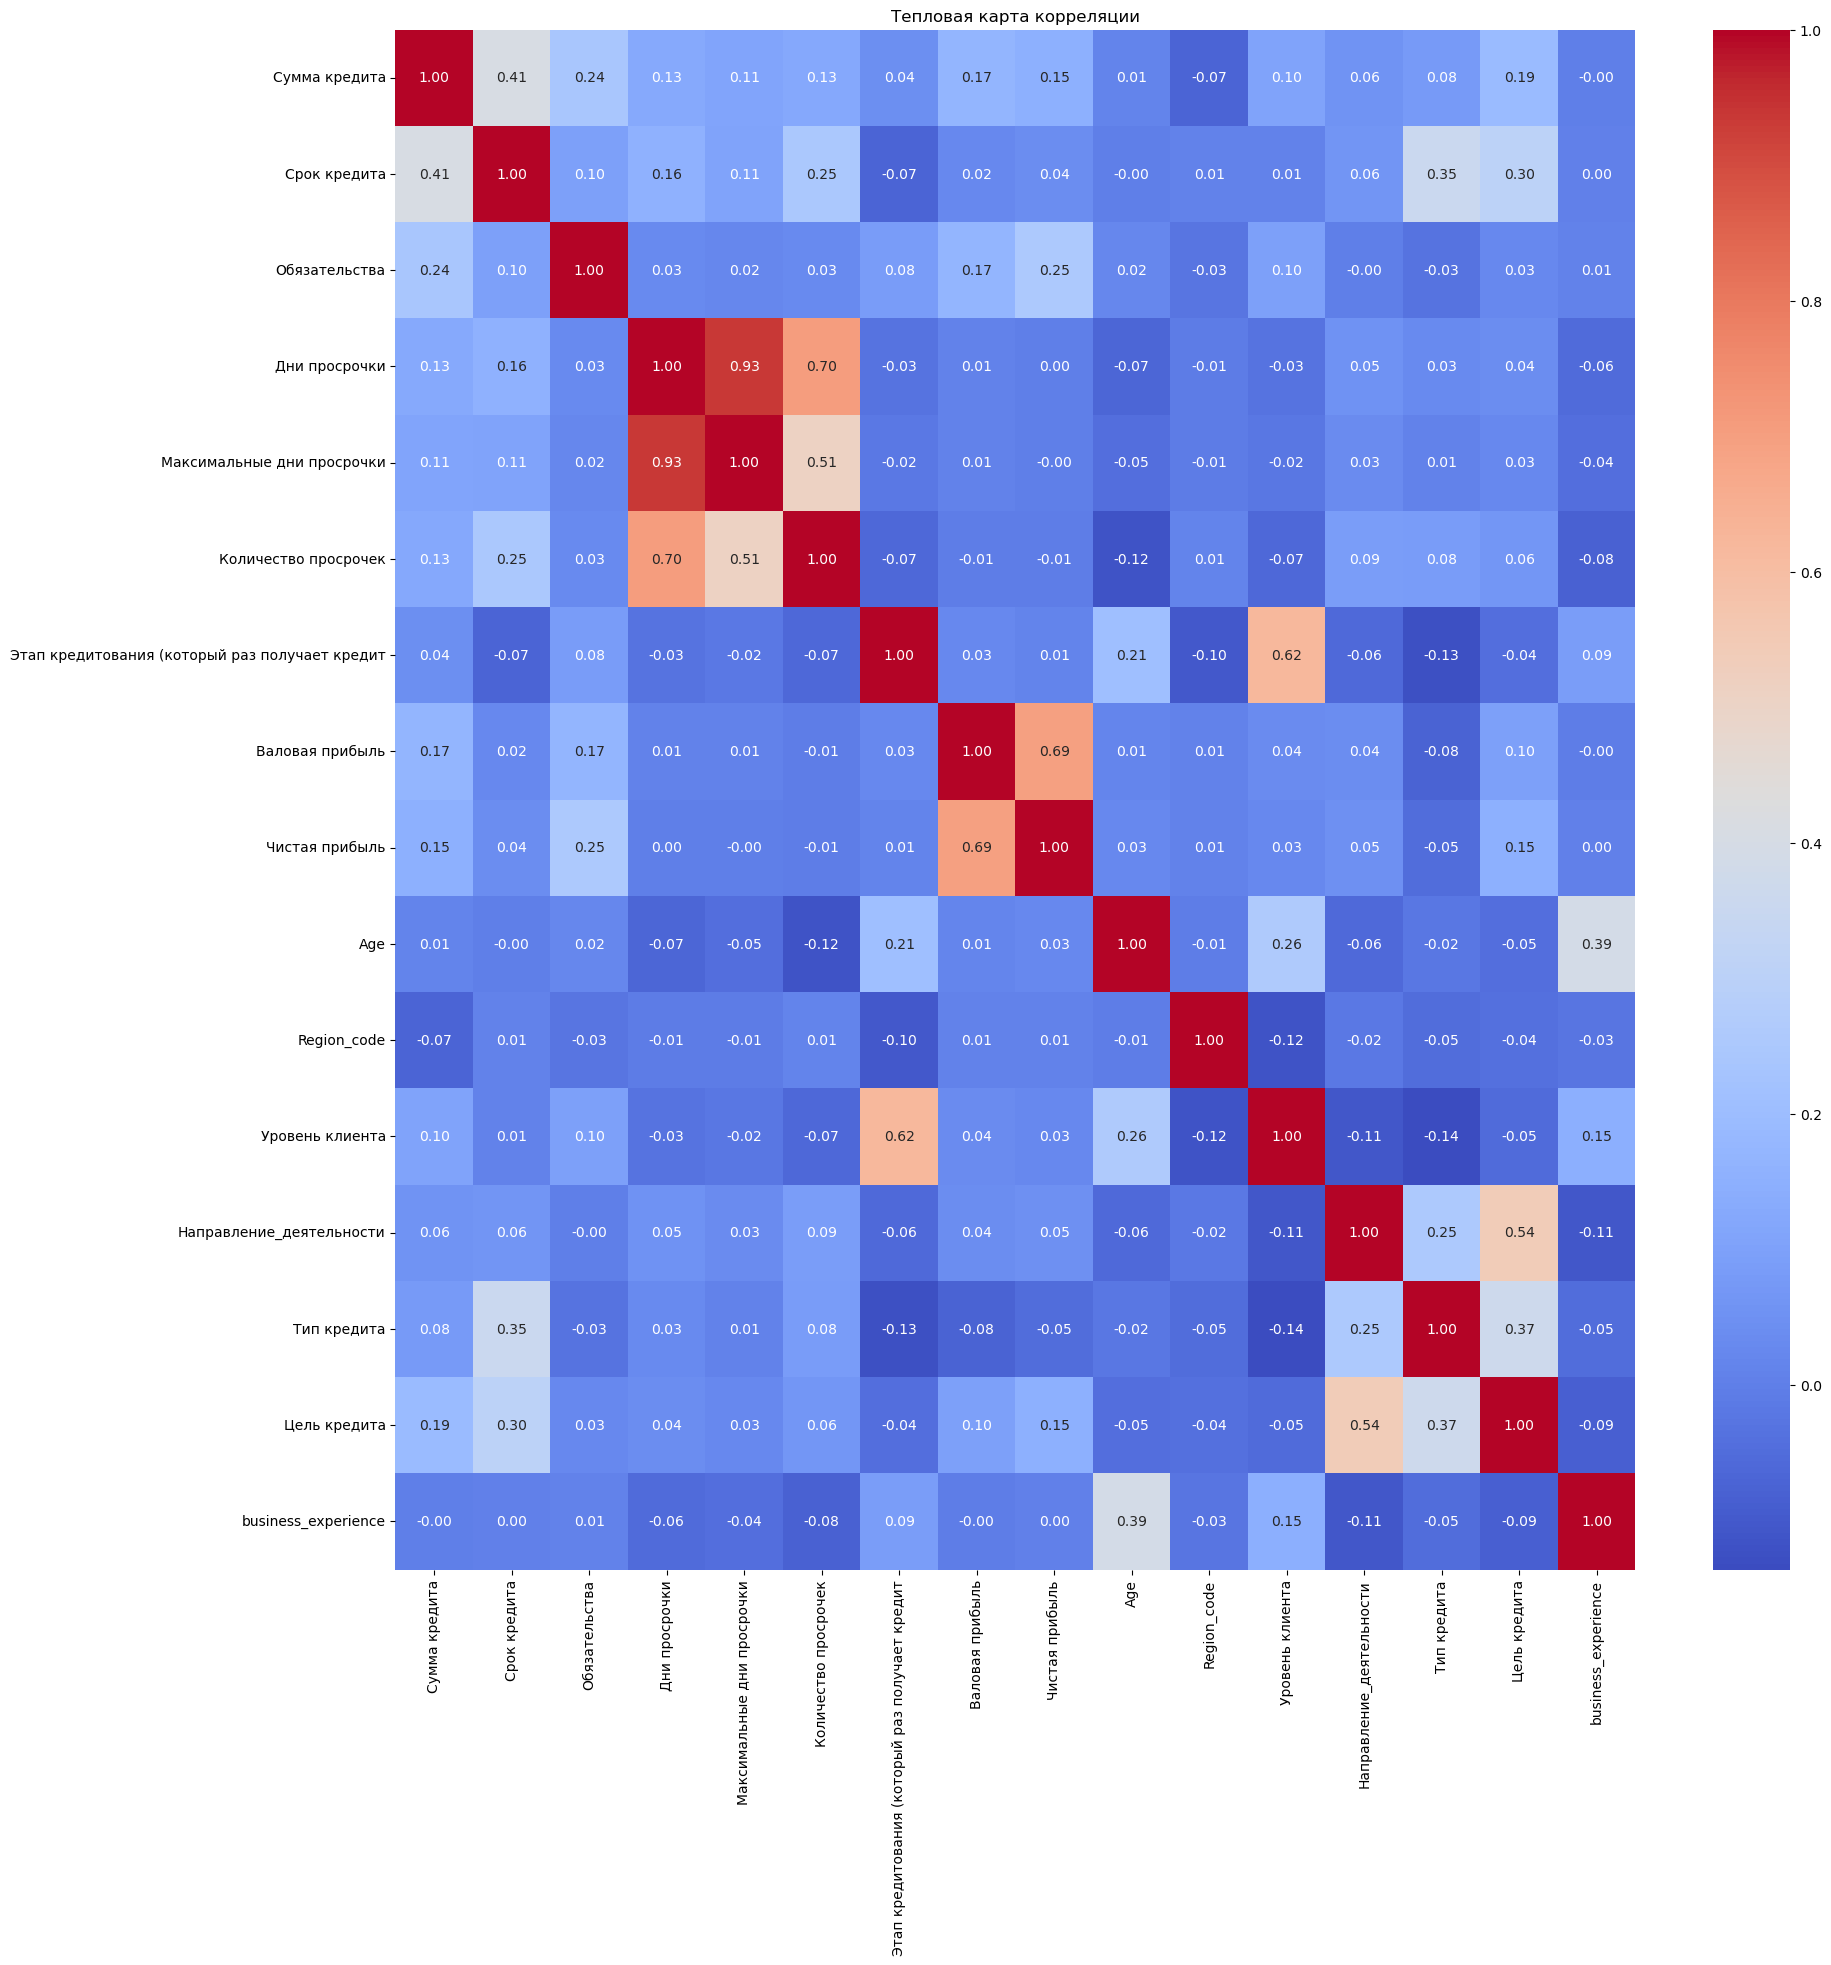

In [60]:
# Вычисляем корреляцию
correlation_matrix = data1.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()


# Используйте всевозможные входные параметры (независимые переменные) и зависимую переменную «Дни просрочки» (меньше 30 дней, 0 дней, 7 дней и 15 дней, 60 дней как 1 и больше как 0 для решения задачи классификации.

In [61]:
data1.columns

Index(['Сумма кредита', 'Срок кредита', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Уровень клиента',
       'Направление_деятельности', 'Тип кредита', 'Цель кредита',
       'business_experience'],
      dtype='object')

In [62]:
#Удаляем ненужный столбец
data1 = data1.drop('Максимальные дни просрочки', axis=1)

In [63]:
#Создаем новый столбец среднее количество просроченных дней
data1['Сред_просрочки'] = data1['Дни просрочки']/data1['Количество просрочек']

In [64]:
data1.head()

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,business_experience,Сред_просрочки
0,6793.2,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.5
1,1000.0,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.2
2,7600.0,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,NaN
3,1500.0,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,NaN
4,2500.0,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.5


In [65]:
#Заполняем пустые ячейки значением 0, так как клиент ни разу не просрочивал
data1['Сред_просрочки'].fillna(0, inplace=True)

### Создание и заполнение нового столбца "выдача"

#### Трешхолд 30 дней

In [66]:
data1.loc[data1['Сред_просрочки']<=30, 'выдача']=1
data1.loc[data1['Сред_просрочки']>30, 'выдача']=0

In [67]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [68]:
data2 = data1.drop('Сред_просрочки', axis=1)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Смотрим какие переменные важны для столбца 'Дни просрочки'
features = data2.drop(['выдача'], axis=1)
target = data2['выдача']

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создаем модель случайного леса
rf_model = RandomForestClassifier(random_state=42)

# Обучаем модель на обучающем наборе данных
rf_model.fit(X_train, y_train)

# Получаем важность признаков
feature_importances = rf_model.feature_importances_

# Создаем DataFrame для отображения важности признаков
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Сортируем по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Выводим результаты
print(feature_importance_df)


                                           Feature  Importance
3                                    Дни просрочки    0.573622
4                             Количество просрочек    0.136939
1                                     Срок кредита    0.051846
7                                   Чистая прибыль    0.041005
0                                    Сумма кредита    0.035904
8                                              Age    0.027855
9                                      Region_code    0.025238
6                                  Валовая прибыль    0.024029
11                        Направление_деятельности    0.015140
2                                    Обязательства    0.014659
5   Этап кредитования (который раз получает кредит    0.013419
13                                    Цель кредита    0.012850
10                                 Уровень клиента    0.009594
14                             business_experience    0.009538
12                                     Тип кредита    0

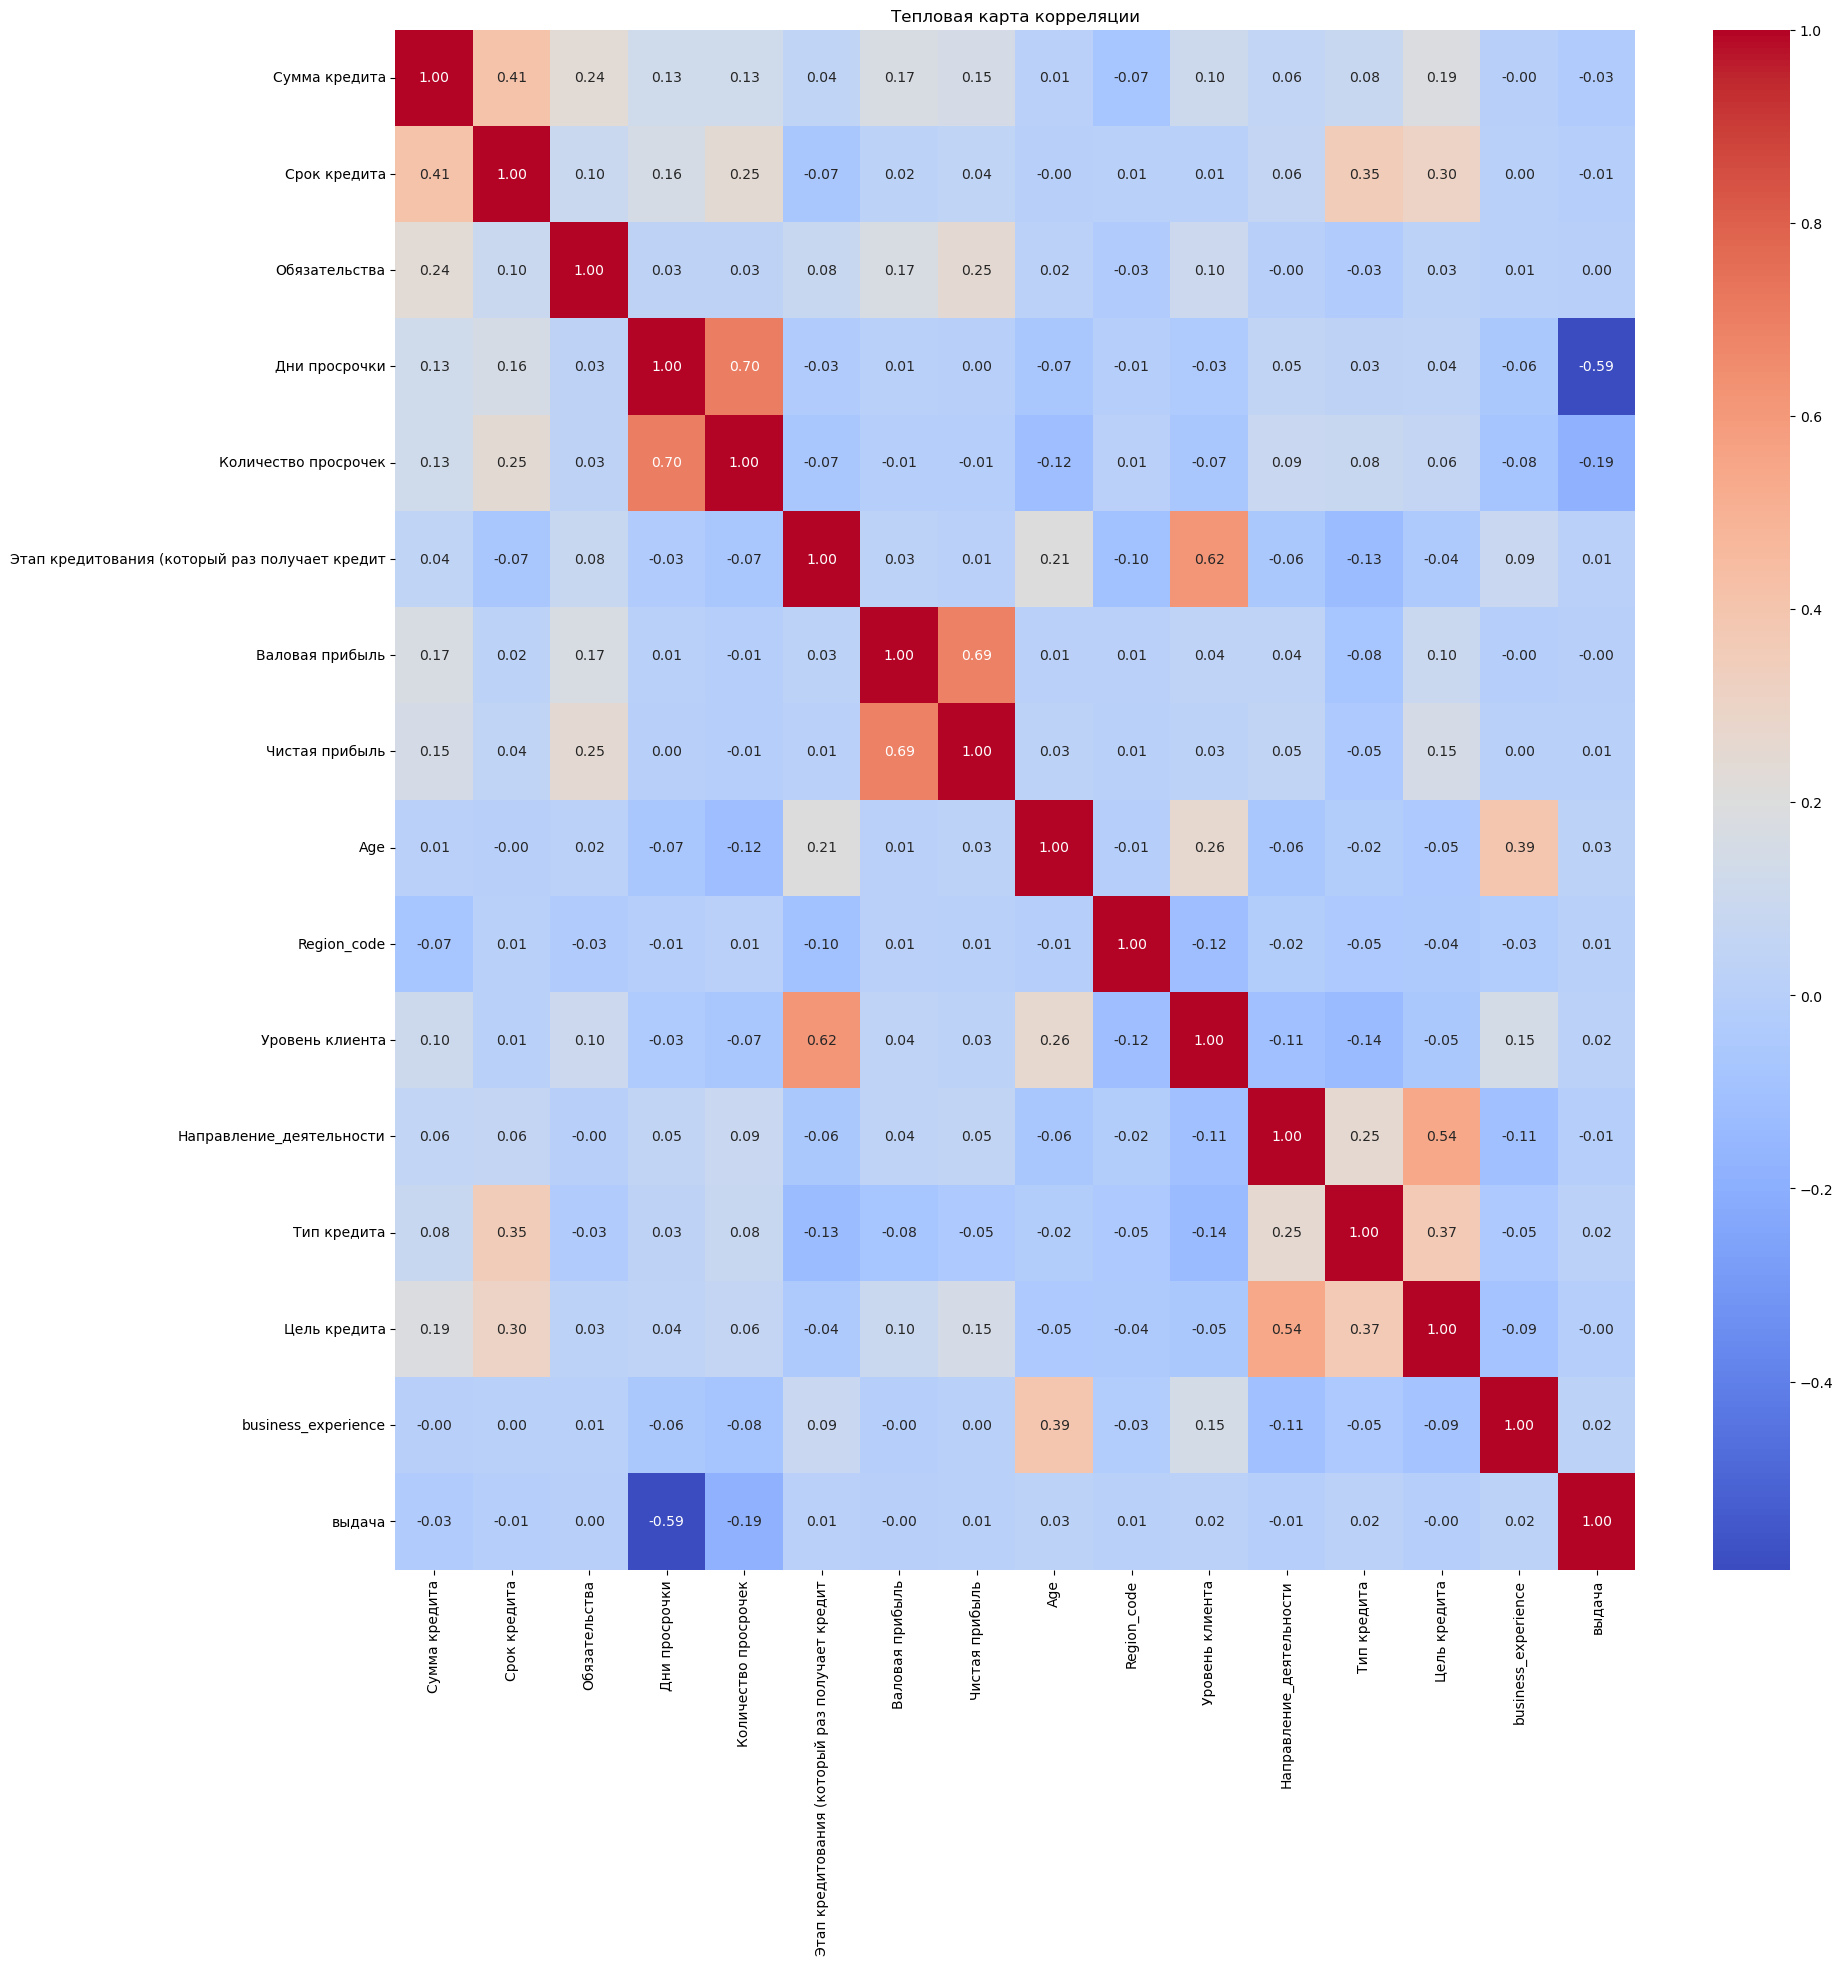

In [70]:
# Вычисляем корреляцию
correlation_matrix = data2.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

Исходя из features importance, используем в качестве входных данных следующие переменные:

In [71]:
#Берем переменные, у которох Importance выше 0.1
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [72]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [73]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.996800249736606
Confusion Matrix:
[[  136    58]
 [   24 25409]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.70      0.77       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.92      0.85      0.88     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.979430693380343


### Б) дерево решений;

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9992195731064892
Confusion Matrix:
[[  185     9]
 [   11 25422]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.97      0.98      0.97     25627
weighted avg       1.00      1.00      1.00     25627



In [76]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9765878692388044


### В) случайны лес;

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9985171889023295
Confusion Matrix:
[[  161    33]
 [    5 25428]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.98      0.91      0.95     25627
weighted avg       1.00      1.00      1.00     25627



In [78]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9997484800370977


### Г) К-ближайших соседей;

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9901666211417646
Confusion Matrix:
[[   79   115]
 [  137 25296]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.41      0.39       194
         1.0       1.00      0.99      1.00     25433

    accuracy                           0.99     25627
   macro avg       0.68      0.70      0.69     25627
weighted avg       0.99      0.99      0.99     25627



In [80]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7011877984646137


### Е) алгоритмы бустинга

In [81]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9991805517618138
Confusion Matrix:
[[  185     9]
 [   12 25421]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.97      0.98      0.97     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 0.9993366371405159
Confusion Matrix:
[[  182    12]
 [    5 25428]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.99      0.97      0.98     25627
weighted avg       1.00      1.00      1.00     25627



In [83]:
from catboost import CatBoostClassifier
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5223034	total: 163ms	remaining: 2m 42s
1:	learn: 0.4001909	total: 174ms	remaining: 1m 26s
2:	learn: 0.3098756	total: 182ms	remaining: 1m
3:	learn: 0.2169926	total: 192ms	remaining: 47.8s
4:	learn: 0.1648053	total: 202ms	remaining: 40.2s
5:	learn: 0.1280220	total: 213ms	remaining: 35.2s
6:	learn: 0.0961692	total: 223ms	remaining: 31.6s
7:	learn: 0.0744965	total: 233ms	remaining: 28.9s
8:	learn: 0.0600912	total: 244ms	remaining: 26.9s
9:	learn: 0.0498510	total: 254ms	remaining: 25.1s
10:	learn: 0.0431332	total: 263ms	remaining: 23.6s
11:	learn: 0.0365506	total: 273ms	remaining: 22.5s
12:	learn: 0.0306509	total: 284ms	remaining: 21.5s
13:	learn: 0.0268464	total: 295ms	remaining: 20.8s
14:	learn: 0.0247189	total: 304ms	remaining: 20s
15:	learn: 0.0214527	total: 316ms	remaining: 19.4s
16:	learn: 0.0188681	total: 327ms	remaining: 18.9s
17:	learn: 0.0168354	total: 339ms	remaining: 18.5s
18:	learn: 0.0156357	total: 350ms	remaining: 18.1s
19:	learn: 0.0

In [84]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')

XGBoost:
AUC: 0.9998534658072695

Gradient Boosting:
AUC: 0.9998110053461672

CatBoost:
AUC: 0.9998662343468852


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


Лучший резултат дал модель Дерево Решений. Переходим дальше и смотрим Трешхолд 0 дней

### Трешхолд 0 дней

In [85]:
data1.loc[data1['Сред_просрочки']==0, 'выдача']=1
data1.loc[data1['Сред_просрочки']>0, 'выдача']=0

In [86]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,0.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,0.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,0.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,0.0


In [87]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [88]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Предполагаем, что у вас есть датафрейм data3
# Замените 'выдача' на реальное название вашей зависимой переменной
y = data3['выдача']
X = data3.drop('выдача', axis=1)  # Используйте все остальные столбцы в качестве независимых переменных

# Добавьте столбец с константой, если вы хотите оценить свободный член (intercept)
X_with_const = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)

# Вычисление VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Вывод результатов
print(vif_data)


                                           Признак        VIF
0                                            const  22.641338
1                                    Сумма кредита   1.262451
2                                     Срок кредита   1.277497
3                                    Дни просрочки   1.992501
4                             Количество просрочек   2.089562
5   Этап кредитования (который раз получает кредит   1.070367
6                                  Валовая прибыль   1.948338
7                                   Чистая прибыль   1.936127
8                                              Age   1.235283
9                                      Region_code   1.018861
10                        Направление_деятельности   1.025748
11                             business_experience   1.192139


### А) логистическая регрессия 

In [90]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9998439146212978
Confusion Matrix:
[[13033     4]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 1.0


### Б) дерево решений;

In [92]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [93]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 1.0


### В) случайны лес;

In [94]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [95]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 1.0


### Г) К-ближайших соседей;

In [96]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.5839934444140945
Confusion Matrix:
[[10127  2910]
 [ 7751  4839]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.78      0.66     13037
         1.0       0.62      0.38      0.48     12590

    accuracy                           0.58     25627
   macro avg       0.60      0.58      0.57     25627
weighted avg       0.59      0.58      0.57     25627



In [97]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.6353903258051579


### Е) алгоритмы бустинга

In [98]:
# XGBoost
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [99]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [100]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.4791654	total: 10.7ms	remaining: 10.7s
1:	learn: 0.3173969	total: 20.8ms	remaining: 10.4s
2:	learn: 0.2227933	total: 31.2ms	remaining: 10.4s
3:	learn: 0.1555499	total: 40.9ms	remaining: 10.2s
4:	learn: 0.1057723	total: 51.3ms	remaining: 10.2s
5:	learn: 0.0713731	total: 61.8ms	remaining: 10.2s
6:	learn: 0.0477621	total: 73.1ms	remaining: 10.4s
7:	learn: 0.0319320	total: 83.9ms	remaining: 10.4s
8:	learn: 0.0227885	total: 94.3ms	remaining: 10.4s
9:	learn: 0.0161937	total: 105ms	remaining: 10.4s
10:	learn: 0.0116417	total: 116ms	remaining: 10.4s
11:	learn: 0.0084117	total: 128ms	remaining: 10.5s
12:	learn: 0.0063106	total: 139ms	remaining: 10.6s
13:	learn: 0.0047961	total: 150ms	remaining: 10.5s
14:	learn: 0.0037177	total: 161ms	remaining: 10.6s
15:	learn: 0.0029386	total: 172ms	remaining: 10.6s
16:	learn: 0.0023555	total: 184ms	remaining: 10.6s
17:	learn: 0.0019103	total: 197ms	remaining: 10.8s
18:	learn: 0.0015839	total: 208ms	remaining: 10.7s
19

In [101]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')

XGBoost:
AUC: 1.0

Gradient Boosting:
AUC: 1.0

CatBoost:
AUC: 1.0


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [102]:
import pickle

# Сохранение модели в файл
with open('DecTree_model.pkl', 'wb') as file:
    pickle.dump(DecTree_model, file)
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)  

В данном трешхолде идеальный результат показали сразу несколько моделей: Дерево решений, Случайное лес, Алгоритмы бустинга 

## Трешхолд 7 дней

In [103]:
data1.loc[data1['Сред_просрочки']<=7, 'выдача']=1
data1.loc[data1['Сред_просрочки']>7, 'выдача']=0

In [104]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,0.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,0.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [105]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [106]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [107]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9602372497756273
Confusion Matrix:
[[ 1765   714]
 [  305 22843]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.71      0.78      2479
         1.0       0.97      0.99      0.98     23148

    accuracy                           0.96     25627
   macro avg       0.91      0.85      0.88     25627
weighted avg       0.96      0.96      0.96     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9537589573046038


### Б) дерево решений;

In [109]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9996488078979202
Confusion Matrix:
[[ 2472     7]
 [    2 23146]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [110]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9985449401027034


### В) случайны лес;

In [111]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9987903383150584
Confusion Matrix:
[[ 2476     3]
 [   28 23120]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       0.99      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [112]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9999188361082235


### Г) К-ближайших соседей;

In [113]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8800093651227221
Confusion Matrix:
[[ 1314  1165]
 [ 1910 21238]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.41      0.53      0.46      2479
         1.0       0.95      0.92      0.93     23148

    accuracy                           0.88     25627
   macro avg       0.68      0.72      0.70     25627
weighted avg       0.90      0.88      0.89     25627



In [114]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7329386441756163


### Е) алгоритмы бустинга

In [115]:
# XGBoost
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9993756584851914
Confusion Matrix:
[[ 2474     5]
 [   11 23137]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [116]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 0.9998048932766224
Confusion Matrix:
[[ 2478     1]
 [    4 23144]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [117]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.4987593	total: 11.8ms	remaining: 11.8s
1:	learn: 0.4242427	total: 23.1ms	remaining: 11.5s
2:	learn: 0.3626458	total: 34.2ms	remaining: 11.4s
3:	learn: 0.2576409	total: 45.1ms	remaining: 11.2s
4:	learn: 0.2278708	total: 56ms	remaining: 11.1s
5:	learn: 0.2006061	total: 67.4ms	remaining: 11.2s
6:	learn: 0.1731189	total: 79ms	remaining: 11.2s
7:	learn: 0.1509735	total: 90ms	remaining: 11.2s
8:	learn: 0.1190828	total: 101ms	remaining: 11.1s
9:	learn: 0.1111926	total: 112ms	remaining: 11.1s
10:	learn: 0.1021924	total: 124ms	remaining: 11.1s
11:	learn: 0.0968092	total: 135ms	remaining: 11.1s
12:	learn: 0.0916519	total: 146ms	remaining: 11.1s
13:	learn: 0.0733497	total: 159ms	remaining: 11.2s
14:	learn: 0.0704039	total: 173ms	remaining: 11.3s
15:	learn: 0.0679933	total: 187ms	remaining: 11.5s
16:	learn: 0.0561166	total: 201ms	remaining: 11.6s
17:	learn: 0.0492467	total: 213ms	remaining: 11.6s
18:	learn: 0.0469805	total: 227ms	remaining: 11.7s
19:	learn

In [118]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')

XGBoost:
AUC: 0.999997542864468

Gradient Boosting:
AUC: 0.999988777338421

CatBoost:
AUC: 0.9999985187480835


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


Лучший результат показали Дерево решений, GradientBoost и CatBoost

### Трешхолд 15 дней 

In [119]:
data1.loc[data1['Сред_просрочки']<=15, 'выдача']=1
data1.loc[data1['Сред_просрочки']>15, 'выдача']=0

In [120]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [121]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [122]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [123]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9854840597807001
Confusion Matrix:
[[  594   278]
 [   94 24661]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76       872
         1.0       0.99      1.00      0.99     24755

    accuracy                           0.99     25627
   macro avg       0.93      0.84      0.88     25627
weighted avg       0.98      0.99      0.98     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9611344385991893


### Б) дерево решений;

In [125]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9992976157958403
Confusion Matrix:
[[  860    12]
 [    6 24749]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       1.00      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [126]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.992998078416185


### В) случайны лес;

In [127]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9982830608342763
Confusion Matrix:
[[  841    31]
 [   13 24742]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       0.99      0.98      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [128]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9999028784843762


### Г) К-ближайших соседей;

In [129]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9593007375034144
Confusion Matrix:
[[  409   463]
 [  580 24175]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.41      0.47      0.44       872
         1.0       0.98      0.98      0.98     24755

    accuracy                           0.96     25627
   macro avg       0.70      0.72      0.71     25627
weighted avg       0.96      0.96      0.96     25627



In [130]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7252630596358071


### Е) алгоритмы бустинга

In [131]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9992195731064892
Confusion Matrix:
[[  864     8]
 [   12 24743]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       0.99      1.00      0.99     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [132]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.9998439146212978
Confusion Matrix:
[[  871     1]
 [    3 24752]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [133]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5722428	total: 12.3ms	remaining: 12.3s
1:	learn: 0.4787967	total: 23.7ms	remaining: 11.8s
2:	learn: 0.3910596	total: 34.9ms	remaining: 11.6s
3:	learn: 0.3201465	total: 46.1ms	remaining: 11.5s
4:	learn: 0.2292576	total: 56.4ms	remaining: 11.2s
5:	learn: 0.1912929	total: 67.7ms	remaining: 11.2s
6:	learn: 0.1563131	total: 79ms	remaining: 11.2s
7:	learn: 0.1396224	total: 90.3ms	remaining: 11.2s
8:	learn: 0.1171167	total: 101ms	remaining: 11.1s
9:	learn: 0.1018961	total: 112ms	remaining: 11s
10:	learn: 0.0842396	total: 123ms	remaining: 11s
11:	learn: 0.0655413	total: 134ms	remaining: 11s
12:	learn: 0.0613475	total: 149ms	remaining: 11.3s
13:	learn: 0.0567315	total: 161ms	remaining: 11.3s
14:	learn: 0.0499735	total: 177ms	remaining: 11.6s
15:	learn: 0.0443423	total: 190ms	remaining: 11.7s
16:	learn: 0.0379089	total: 205ms	remaining: 11.9s
17:	learn: 0.0368922	total: 220ms	remaining: 12s
18:	learn: 0.0336302	total: 234ms	remaining: 12.1s
19:	learn: 0.

In [134]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')


XGBoost:
AUC: 0.9999843419640921

Gradient Boosting:
AUC: 0.9999588860743543

CatBoost:
AUC: 0.9999952747938976


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


В данном трешхолде одинаковые хорошие результаты показали GradientBoost и CatBoost, а также неплохой результат показала модель Дерево решений

## Трешхолд 20 дней 

In [135]:
data1.loc[data1['Сред_просрочки']<=20, 'выдача']=1
data1.loc[data1['Сред_просрочки']>20, 'выдача']=0
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [136]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [137]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9920396456861903
Confusion Matrix:
[[  394   136]
 [   68 25029]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79       530
         1.0       0.99      1.00      1.00     25097

    accuracy                           0.99     25627
   macro avg       0.92      0.87      0.90     25627
weighted avg       0.99      0.99      0.99     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9729806088226738


### Б) дерево решений;

In [139]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9996488078979202
Confusion Matrix:
[[  528     2]
 [    7 25090]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [140]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9979737486476997


### В) случайны лес;

In [141]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9981269754555742
Confusion Matrix:
[[  494    36]
 [   12 25085]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      0.97      0.98     25627
weighted avg       1.00      1.00      1.00     25627



In [142]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9999080924503492


### Г) К-ближайших соседей;

In [143]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9759238303351934
Confusion Matrix:
[[  250   280]
 [  337 24760]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.47      0.45       530
         1.0       0.99      0.99      0.99     25097

    accuracy                           0.98     25627
   macro avg       0.71      0.73      0.72     25627
weighted avg       0.98      0.98      0.98     25627



In [144]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7304954888241172


### Е) алгоритмы бустинга

In [145]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9992585944511648
Confusion Matrix:
[[  520    10]
 [    9 25088]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [146]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.999414679829867
Confusion Matrix:
[[  521     9]
 [    6 25091]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [147]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5541006	total: 11.9ms	remaining: 11.8s
1:	learn: 0.4436740	total: 21.9ms	remaining: 10.9s
2:	learn: 0.3610235	total: 31.2ms	remaining: 10.4s
3:	learn: 0.2866968	total: 41.6ms	remaining: 10.4s
4:	learn: 0.2335858	total: 52.4ms	remaining: 10.4s
5:	learn: 0.1863633	total: 62.2ms	remaining: 10.3s
6:	learn: 0.1504943	total: 73.9ms	remaining: 10.5s
7:	learn: 0.1281318	total: 84.3ms	remaining: 10.5s
8:	learn: 0.1085613	total: 95.1ms	remaining: 10.5s
9:	learn: 0.0930291	total: 105ms	remaining: 10.4s
10:	learn: 0.0793822	total: 114ms	remaining: 10.2s
11:	learn: 0.0690404	total: 123ms	remaining: 10.2s
12:	learn: 0.0587370	total: 133ms	remaining: 10.1s
13:	learn: 0.0458765	total: 142ms	remaining: 10s
14:	learn: 0.0406074	total: 151ms	remaining: 9.93s
15:	learn: 0.0331124	total: 161ms	remaining: 9.92s
16:	learn: 0.0314070	total: 173ms	remaining: 10s
17:	learn: 0.0301226	total: 185ms	remaining: 10.1s
18:	learn: 0.0288252	total: 196ms	remaining: 10.1s
19:	le

In [148]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')


XGBoost:
AUC: 0.9999803028400749

Gradient Boosting:
AUC: 0.9999831972700639

CatBoost:
AUC: 0.9999871442200489


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [149]:
import pickle

# Сохранение модели в файл
with open('DecTree_model2.pkl', 'wb') as file:
    pickle.dump(DecTree_model, file)
with open('knn_model2.pkl', 'wb') as file:
    pickle.dump(knn_model, file)
with open('lr_model2.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

В данном трешхолде неплохие результаты показали Дерево решений и модели бустинга

## Трешхолд 60 дней 

In [150]:
data1.loc[data1['Сред_просрочки']<=60, 'выдача']=1
data1.loc[data1['Сред_просрочки']>60, 'выдача']=0
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [151]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [152]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9990634877277871
Confusion Matrix:
[[   11    18]
 [    6 25592]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.38      0.48        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.82      0.69      0.74     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9678140264190899


### Б) дерево решений;

In [154]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9996878292425957
Confusion Matrix:
[[   24     5]
 [    3 25595]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.94      0.91      0.93     25627
weighted avg       1.00      1.00      1.00     25627



In [155]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9137345051202815


### В) случайны лес;

In [156]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9992585944511648
Confusion Matrix:
[[   10    19]
 [    0 25598]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.34      0.51        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       1.00      0.67      0.76     25627
weighted avg       1.00      1.00      1.00     25627



In [157]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9823625768176932


### Г) К-ближайших соседей;

In [158]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9980099114215476
Confusion Matrix:
[[    2    27]
 [   24 25574]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.08      0.07      0.07        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.54      0.53      0.54     25627
weighted avg       1.00      1.00      1.00     25627



In [159]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.5340139719967346


### Е) алгоритмы бустинга

In [160]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9995317438638935
Confusion Matrix:
[[   21     8]
 [    4 25594]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.92      0.86      0.89     25627
weighted avg       1.00      1.00      1.00     25627



In [161]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.9991025090724627
Confusion Matrix:
[[    6    23]
 [    0 25598]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.21      0.34        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       1.00      0.60      0.67     25627
weighted avg       1.00      1.00      1.00     25627



In [162]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5042226	total: 12.3ms	remaining: 12.3s
1:	learn: 0.3394713	total: 25.3ms	remaining: 12.6s
2:	learn: 0.2290492	total: 37.2ms	remaining: 12.4s
3:	learn: 0.1567703	total: 50.3ms	remaining: 12.5s
4:	learn: 0.1065498	total: 63.7ms	remaining: 12.7s
5:	learn: 0.0736477	total: 76.7ms	remaining: 12.7s
6:	learn: 0.0509242	total: 89.7ms	remaining: 12.7s
7:	learn: 0.0364476	total: 101ms	remaining: 12.6s
8:	learn: 0.0267417	total: 113ms	remaining: 12.5s
9:	learn: 0.0199343	total: 125ms	remaining: 12.4s
10:	learn: 0.0158037	total: 135ms	remaining: 12.2s
11:	learn: 0.0120090	total: 146ms	remaining: 12.1s
12:	learn: 0.0095512	total: 157ms	remaining: 11.9s
13:	learn: 0.0077367	total: 169ms	remaining: 11.9s
14:	learn: 0.0064144	total: 179ms	remaining: 11.8s
15:	learn: 0.0056348	total: 189ms	remaining: 11.6s
16:	learn: 0.0049871	total: 199ms	remaining: 11.5s
17:	learn: 0.0044001	total: 212ms	remaining: 11.6s
18:	learn: 0.0039469	total: 227ms	remaining: 11.7s
19:	

In [163]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')


XGBoost:
AUC: 0.9896880413609899

Gradient Boosting:
AUC: 0.3288113834324341

CatBoost:
AUC: 0.991917472000776


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


В данном трешхолде также неплохие результаты показали Дерево решений, XGBoost и CatBoost

Исходя из результатов, я выбрал трешхолд 0 дней и 3 модели для классификации: Лог.регрессию, Дерево решений и KNN

# 4. Теперь, используя кол-во просроченных дней делайте регрессию.

In [164]:
data1.columns

Index(['Сумма кредита', 'Срок кредита', 'Обязательства', 'Дни просрочки',
       'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Уровень клиента',
       'Направление_деятельности', 'Тип кредита', 'Цель кредита',
       'business_experience', 'Сред_просрочки', 'выдача'],
      dtype='object')

In [165]:
data2 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

Сумма кредита                                     4.966222e-07
Срок кредита                                      8.774135e-04
Количество просрочек                              3.368152e-02
Этап кредитования (который раз получает кредит    1.670209e-04
Валовая прибыль                                   4.605275e-08
Чистая прибыль                                    9.313710e-08
Age                                               2.243346e-04
Region_code                                       1.119094e-04
Направление_деятельности                          3.799322e-04
business_experience                               8.688136e-04
выдача                                            9.636884e-01
dtype: float64


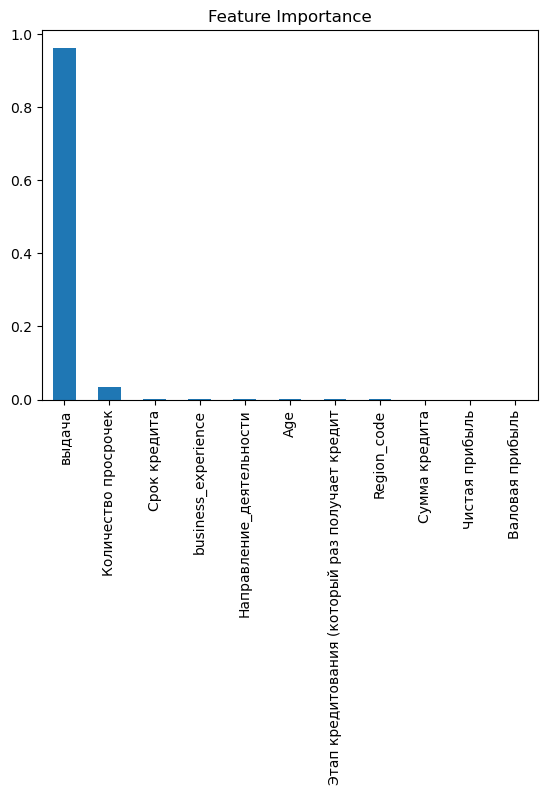

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = data2['Дни просрочки']
X = data2.drop(['Дни просрочки'], axis=1)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Важность признаков - абсолютные значения коэффициентов
feature_importance = pd.Series(abs(model.coef_), index=X.columns)
feature_importance = feature_importance / feature_importance.sum()  # Нормализация для получения доли важности
print(feature_importance)

# Визуализация важности признаков
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Разделите данные на тренировочный и тестовый наборы
X_reg = data2.drop('Дни просрочки', axis=1)
y_reg = data2['Дни просрочки']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

# Предсказание на тестовом наборе
y_pred_reg = model_reg.predict(X_test_reg)

# Оценка качества модели
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Веса признаков
feature_weights = dict(zip(data2.drop('Дни просрочки', axis=1), model_reg.coef_))
print('Веса признаков:', feature_weights)


Mean Squared Error: 1064.291279536607
R^2 Score: 0.5480086594615827
Веса признаков: {'Сумма кредита': 0.00016983875291341077, 'Срок кредита': -0.30006471395375306, 'Количество просрочек': 11.518668321347944, 'Этап кредитования (который раз получает кредит': 0.05711911673838333, 'Валовая прибыль': 1.574947985268435e-05, 'Чистая прибыль': -3.1851752398131067e-05, 'Age': 0.07671971545014206, 'Region_code': -0.03827166409561168, 'Направление_деятельности': -0.1299321821668204, 'business_experience': -0.2971236697460649, 'выдача': -329.5696925705515}


   Сумма кредита: Имеет маленький положительный вес, что указывает на слабое влияние на "Дни просрочки".

   Срок кредита: Отрицательный вес, что говорит о том, что увеличение срока кредита связано с уменьшением "Дни просрочки".

   Количество просрочек: Значительный положительный вес, подчеркивающий сильное влияние "Количество просрочек" на "Дни просрочки".

   Валовая прибыль: Новый отрицательный вес, что может указывать на некоторую обратную связь между "Валовой прибылью" и "Днями просрочек".

   Age: Маленький положительный вес, что указывает на слабое влияние возраста на "Дни просрочек".

   выдача: Маленький отрицательный вес, что может быть связано с тем, что "выдача" является целевой переменной и, возможно, избыточной для предсказания "Дни просрочек".

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data2.drop(['Дни просрочки'], axis=1)
X_with_const = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)
vif_data = pd.DataFrame()
vif_data["Признак"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print('\nVIF:')
print(vif_data)


VIF:
                                           Признак         VIF
0                                            const  892.951417
1                                    Сумма кредита    1.257398
2                                     Срок кредита    1.275116
3                             Количество просрочек    1.089636
4   Этап кредитования (который раз получает кредит    1.070333
5                                  Валовая прибыль    1.948266
6                                   Чистая прибыль    1.936042
7                                              Age    1.234697
8                                      Region_code    1.018605
9                         Направление_деятельности    1.025572
10                             business_experience    1.192051
11                                          выдача    1.002225


In [170]:
#В конечном итоге выбираем только следующие переменные:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

## Линейная регрессия, МНК 

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y = data3['Дни просрочки']
X = data3.drop(['Дни просрочки'], axis=1)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация модели линейной регрессии
linreg = LinearRegression()

# Обучение модели
linreg.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = linreg.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print('Коэффициенты регрессии:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

Mean Squared Error: 1064.291279536607
R^2 Score: 0.5480086594615827
Коэффициенты регрессии:
Сумма кредита: 0.00016983875291341077
Срок кредита: -0.30006471395375306
Количество просрочек: 11.518668321347944
Этап кредитования (который раз получает кредит: 0.05711911673838333
Валовая прибыль: 1.574947985268435e-05
Чистая прибыль: -3.1851752398131067e-05
Age: 0.07671971545014206
Region_code: -0.03827166409561168
Направление_деятельности: -0.1299321821668204
business_experience: -0.2971236697460649
выдача: -329.5696925705515


   Mean Squared Error (MSE): 1064.291279536607 - это среднеквадратичная ошибка, которая измеряет разницу между фактическими значениями и предсказанными значениями.

   R^2 Score:0.5480086594615827 - это коэффициент детерминации, который представляет собой долю объясненной дисперсии в общей дисперсии данных. Значение 0.5480086594615827 говорит о том, что модель объясняет примерно 51.9% изменчивости в данных, что можно считать умеренным результатом.

   Коэффициенты регрессии: Они предоставляют информацию о весах, с которыми каждый из ваших признаков влияет на целевую переменную. Например, "Количество просрочек" имеет положительный вес 11.5, что означает сильное влияние на увеличение "Дни просрочек". "Срок кредита" имеет отрицательный вес (-0.3), что может указывать на то, что увеличение срока кредита связано с уменьшением "Дни просрочек".

## Случайный лес

In [172]:
from sklearn.ensemble import RandomForestRegressor

# Инициализация и обучение модели случайного леса
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_rf = model_rf.predict(X_test)

# Оценка качества модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Вывод результатов
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 861.6658570891449
R^2 Score (Random Forest): 0.63406116978476


   Mean Squared Error (MSE): 861.66 - уменьшился по сравнению с результатами линейной регрессии, что указывает на лучшую точность предсказаний модели.

   R^2 Score (Random Forest): 0.634 - увеличился по сравнению с линейной регрессией, что также говорит о более хорошем объяснении изменчивости в данных.

## GradientBoost

In [173]:
from sklearn.ensemble import GradientBoostingRegressor

# Инициализация и обучение модели градиентного бустинга
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = model_gb.predict(X_test)

# Оценка качества модели
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Вывод результатов
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
print(f'R^2 Score (Gradient Boosting): {r2_gb}')


Mean Squared Error (Gradient Boosting): 822.5390562918394
R^2 Score (Gradient Boosting): 0.6506778380628782


   Mean Squared Error (MSE): 822.539 - это ещё меньше, чем у Random Forest, что указывает на то, что Gradient Boosting справился с предсказаниями еще лучше.

   R^2 Score (Gradient Boosting): 0.65 - также увеличился по сравнению с Random Forest, что свидетельствует о том, что Gradient Boosting лучше объясняет изменчивость в данных.

In [174]:
#Сохраняем модель градиентного бустинга в пикл файл
with open('model_gb.pkl', 'wb') as file:
    pickle.dump(model_gb, file)

Как итог можно увидеть, что лучший результат по задаче классификации выдали модели логической регрессии, Дерево решений и KNN в трешхолде 0 дней с очень высокими Accuracy и AUC у моделей логической регрессии(Accuracy = 0,99, AUC=0,99), Дерево решений(Accuracy: 1, AUC: 1) и средними у модели KNN(Accuracy: 0,58; AUC:0,63). Но так как при трешхолде 0 дней все будет зависет в основном от дня просрочек, т.е. если все переменные хорошие и у клиента будет хотя бы 1 день просрочек - ему не выдадут кредит, поэтому в качестве оптимального трешхолда возьмём 20 дней с этими же моделями, так как они и в данном интервале дают хороший результат: Accuracy у всех 0.99, у KNN 0.97, а AUC 0.97, 0.99, 0.73 соответственно у логической регресси, Дерево решений, KNN

# 5) Если клиенту отказывается в кредите, то в какую сумму кредить выдавать?
# 6) Модель не только должна сказать выдать или не выдать, но и вероятность возврата в процентах

Для решения данной задачи нам нужно сделать регрессию суммы кредита только в случаях, когда значение в столбце "выдача" равно 0, то есть когда кредит не выдаётся.

In [175]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [176]:
data3.loc[data1['Сред_просрочки']<=20, 'выдача']=1
data3.loc[data1['Сред_просрочки']>20, 'выдача']=0

In [177]:
data3

,Сумма кредита,Срок кредита,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Направление_деятельности,business_experience,выдача
0,6793.20,12,46,4,1,0.0,180.0,39,0,0,2,1.0
1,1000.00,12,11,5,1,0.0,0.0,80,1,1,1,1.0
2,7600.00,12,0,0,2,0.0,1648.0,82,1,2,1,1.0
3,1500.00,12,0,0,1,0.0,150.0,80,0,0,0,1.0
4,2500.00,12,15,2,2,0.0,280.0,75,2,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,53,6,1,2500.0,2683.0,31,35,0,1,1.0
85418,9510.48,24,0,0,1,7360.0,6536.0,25,3,4,1,1.0
85419,30000.00,36,0,0,1,5630.0,6043.0,41,37,2,1,1.0
85420,3000.00,12,2,2,1,0.0,780.0,30,23,0,0,1.0


In [178]:
from sklearn.ensemble import GradientBoostingRegressor

X_regression = data3[data3['выдача'] == 0].drop(['Сумма кредита'], axis=1)
y_regression = data3[data3['выдача'] == 0]['Сумма кредита']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

model_regression = GradientBoostingRegressor()
model_regression.fit(X_train_reg, y_train_reg)

y_pred_reg = model_regression.predict(X_test_reg)

In [179]:
#Сохраняем модель градиентного бустинга в пикл файл
with open('model_gb2.pkl', 'wb') as file:
    pickle.dump(model_regression, file)

In [180]:
#Объединяем все три модели для более правильного ответа
with open('lr_model2.pkl', 'rb') as file:
    lr_model = pickle.load(file)
with open('model_gb.pkl', 'rb') as file:
    model_gb = pickle.load(file)
new_data = [[56827.648505155965, 12, 46, 2, 1, 0, 180, 39, 0, 0, 2]]
prediction_class = lr_model.predict(new_data)
new_data2 = [[6793.20, 12, 4, 1, 0, 180, 39, 0, 0, 2, 1]]
prediction_class2 = model_gb.predict(new_data2)
#Вероятность того, что клиент вернет кредит вовремя
new_data_proba = lr_model.predict_proba(new_data)[:, 1]
print(f'Сколько примерно дней просрочит: {prediction_class2[0].astype(int)}')
print(f'Вероятность возврата кредита: {(new_data_proba[0]*100).astype(int)}')
print(f'Вероятность выдачи кредита: {prediction_class[0]*100}')
if prediction_class[0] == 0:  # Если предсказание "нет"
    prediction_sum = model_regression.predict(new_data)
    print(f'Сумма кредита в случае отказа: {prediction_sum[0]}')
else:
    print('Кредит будет выдан.')

Сколько примерно дней просрочит: 22
Вероятность возврата кредита: 96
Вероятность выдачи кредита: 100.0
Кредит будет выдан.


C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [181]:
data3.columns


Index(['Сумма кредита', 'Срок кредита', 'Дни просрочки',
       'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Направление_деятельности',
       'business_experience', 'выдача'],
      dtype='object')